In [1]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from sklearn.svm import LinearSVC, SVC
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier, XGBRFClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from catboost import CatBoostClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier, HistGradientBoostingClassifier, VotingClassifier

import optuna
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, cross_val_score
from scipy.stats import reciprocal, uniform
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve, auc, r2_score

import warnings
warnings.filterwarnings("ignore")

In [2]:
df1 = pd.read_csv("C:\\Users\\KIIT\\Downloads\\data without infertility _final.csv")

<IPython.core.display.Javascript object>

In [3]:
df2=pd.read_csv("C:\\Users\\KIIT\\OneDrive\\Desktop\\PCOS_infertility.csv")

<IPython.core.display.Javascript object>

In [4]:
df = pd.merge(df1,df2, on='Patient File No.', suffixes=('',' wo_inf'),how='left')

<IPython.core.display.Javascript object>

In [5]:
df.columns

Index(['Sl. No', 'Patient File No.', 'PCOS (Y/N)', ' Age (yrs)', 'Weight (Kg)',
       'Height(Cm) ', 'BMI', 'Blood Group', 'Pulse rate(bpm) ',
       'RR (breaths/min)', 'Hb(g/dl)', 'Cycle(R/I)', 'Cycle length(days)',
       'Marraige Status (Yrs)', 'Pregnant(Y/N)', 'No. of aborptions',
       'FSH(mIU/mL)', 'LH(mIU/mL)', 'FSH/LH', 'Hip(inch)', 'Waist(inch)',
       'Waist:Hip Ratio', 'TSH (mIU/L)', 'AMH(ng/mL)', 'PRL(ng/mL)',
       'Vit D3 (ng/mL)', 'PRG(ng/mL)', 'RBS(mg/dl)', 'Weight gain(Y/N)',
       'hair growth(Y/N)', 'Skin darkening (Y/N)', 'Hair loss(Y/N)',
       'Pimples(Y/N)', 'Fast food (Y/N)', 'Reg.Exercise(Y/N)',
       'BP _Systolic (mmHg)', 'BP _Diastolic (mmHg)', 'Follicle No. (L)',
       'Follicle No. (R)', 'Avg. F size (L) (mm)', 'Avg. F size (R) (mm)',
       'Endometrium (mm)', 'Unnamed: 42', 'Sl. No wo_inf', 'PCOS (Y/N) wo_inf',
       '  I   beta-HCG(mIU/mL)', 'II    beta-HCG(mIU/mL)',
       'AMH(ng/mL) wo_inf'],
      dtype='object')

In [6]:
#Drop repeated features
df =df.drop(['Sl. No wo_inf', 'PCOS (Y/N) wo_inf','AMH(ng/mL) wo_inf'], axis=1)

#Change the title of the properties
df = df.rename(columns = {"PCOS (Y/N)":"Target"})




In [7]:
df.head() 

,Sl. No,Patient File No.,Target,Age (yrs),Weight (Kg),Height(Cm),BMI,Blood Group,Pulse rate(bpm),RR (breaths/min),...,BP _Systolic (mmHg),BP _Diastolic (mmHg),Follicle No. (L),Follicle No. (R),Avg. F size (L) (mm),Avg. F size (R) (mm),Endometrium (mm),Unnamed: 42,I beta-HCG(mIU/mL),II beta-HCG(mIU/mL)
0,1,10001,0,28,44.6,152.0,19.300000,15,78,22,...,110,80,3,3,18.0,18.0,8.5,NaN,1.99,1.99
1,2,10002,0,36,65.0,161.5,24.921163,15,74,20,...,120,70,3,5,15.0,14.0,3.7,NaN,60.80,1.99
2,3,10003,1,33,68.8,165.0,25.270891,11,72,18,...,120,80,13,15,18.0,20.0,10.0,NaN,494.08,494.08
3,4,10004,0,37,65.0,148.0,29.674945,13,72,20,...,120,70,2,2,15.0,14.0,7.5,NaN,1.99,1.99
4,5,10005,0,25,52.0,161.0,20.060954,11,72,18,...,120,80,3,4,16.0,14.0,7.0,NaN,801.45,801.45


In [8]:
df.drop(['Sl. No', 'Patient File No.'],axis=1, inplace=True)

In [9]:
df["AMH(ng/mL)"] = pd.to_numeric(df["AMH(ng/mL)"], errors='coerce')
df["II    beta-HCG(mIU/mL)"] = pd.to_numeric(df["II    beta-HCG(mIU/mL)"], errors='coerce')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [10]:
df['Marraige Status (Yrs)'].fillna(df['Marraige Status (Yrs)'].median(),inplace=True)
df['II    beta-HCG(mIU/mL)'].fillna(df['II    beta-HCG(mIU/mL)'].median(),inplace=True)
df['AMH(ng/mL)'].fillna(df['AMH(ng/mL)'].median(),inplace=True)
df['Fast food (Y/N)'].fillna(df['Fast food (Y/N)'].median(),inplace=True)

In [11]:
df.isnull().sum()

Target                      0
 Age (yrs)                  0
Weight (Kg)                 0
Height(Cm)                  0
BMI                         0
Blood Group                 0
Pulse rate(bpm)             0
RR (breaths/min)            0
Hb(g/dl)                    0
Cycle(R/I)                  0
Cycle length(days)          0
Marraige Status (Yrs)       0
Pregnant(Y/N)               0
No. of aborptions           0
FSH(mIU/mL)                 0
LH(mIU/mL)                  0
FSH/LH                      0
Hip(inch)                   0
Waist(inch)                 0
Waist:Hip Ratio             0
TSH (mIU/L)                 0
AMH(ng/mL)                  0
PRL(ng/mL)                  0
Vit D3 (ng/mL)              0
PRG(ng/mL)                  0
RBS(mg/dl)                  0
Weight gain(Y/N)            0
hair growth(Y/N)            0
Skin darkening (Y/N)        0
Hair loss(Y/N)              0
Pimples(Y/N)                0
Fast food (Y/N)             0
Reg.Exercise(Y/N)           0
BP _Systol

In [12]:
df=df.drop(['Unnamed: 42'], axis=1)

Text(0.5, 0, '0 - Not PCOS, 1 - PCOS')

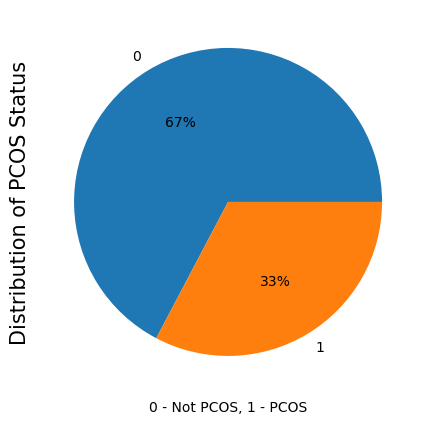

In [13]:
fig, ax1 = plt.subplots(figsize=(10, 5))
df.groupby('Target').size().plot(kind='pie', autopct='%1.0f%%',)
ax1.set_ylabel('Distribution of PCOS Status', size=15)
ax1.set_xlabel('0 - Not PCOS, 1 - PCOS')

In [14]:
df['Fast food (Y/N)'].fillna(df['Fast food (Y/N)'].median(),inplace=True)

In [15]:
df['Marraige Status (Yrs)'].fillna(df['Marraige Status (Yrs)'].median(),inplace=True)

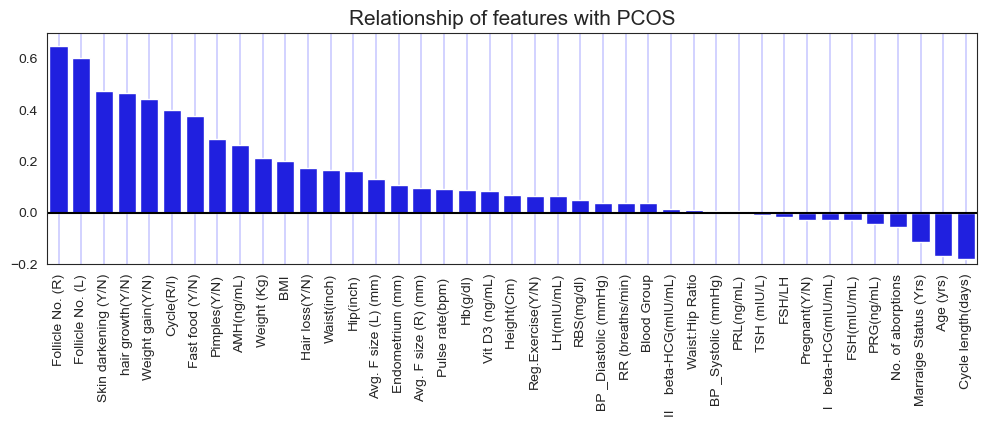

In [16]:
infect_corr = df.corr()['Target'].drop('Target', axis=0)
infect_corr = infect_corr.sort_values(ascending=False)
sns.set_style("white")
plt.figure(figsize=(12,3))
sns.barplot(y=infect_corr.values, x=infect_corr.index, color="blue")
plt.axhline(0, color="k")
plt.xticks(rotation=90)
plt.grid(visible=True, axis="x", color="b", lw=0.25)
plt.ylim(-0.2, 0.7)
plt.title("Relationship of features with PCOS", fontsize=15)
plt.show()

In [17]:
df.columns

Index(['Target', ' Age (yrs)', 'Weight (Kg)', 'Height(Cm) ', 'BMI',
       'Blood Group', 'Pulse rate(bpm) ', 'RR (breaths/min)', 'Hb(g/dl)',
       'Cycle(R/I)', 'Cycle length(days)', 'Marraige Status (Yrs)',
       'Pregnant(Y/N)', 'No. of aborptions', 'FSH(mIU/mL)', 'LH(mIU/mL)',
       'FSH/LH', 'Hip(inch)', 'Waist(inch)', 'Waist:Hip Ratio', 'TSH (mIU/L)',
       'AMH(ng/mL)', 'PRL(ng/mL)', 'Vit D3 (ng/mL)', 'PRG(ng/mL)',
       'RBS(mg/dl)', 'Weight gain(Y/N)', 'hair growth(Y/N)',
       'Skin darkening (Y/N)', 'Hair loss(Y/N)', 'Pimples(Y/N)',
       'Fast food (Y/N)', 'Reg.Exercise(Y/N)', 'BP _Systolic (mmHg)',
       'BP _Diastolic (mmHg)', 'Follicle No. (L)', 'Follicle No. (R)',
       'Avg. F size (L) (mm)', 'Avg. F size (R) (mm)', 'Endometrium (mm)',
       '  I   beta-HCG(mIU/mL)', 'II    beta-HCG(mIU/mL)'],
      dtype='object')

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541 entries, 0 to 540
Data columns (total 42 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Target                  541 non-null    int64  
 1    Age (yrs)              541 non-null    int64  
 2   Weight (Kg)             541 non-null    float64
 3   Height(Cm)              541 non-null    float64
 4   BMI                     541 non-null    float64
 5   Blood Group             541 non-null    int64  
 6   Pulse rate(bpm)         541 non-null    int64  
 7   RR (breaths/min)        541 non-null    int64  
 8   Hb(g/dl)                541 non-null    float64
 9   Cycle(R/I)              541 non-null    int64  
 10  Cycle length(days)      541 non-null    int64  
 11  Marraige Status (Yrs)   541 non-null    float64
 12  Pregnant(Y/N)           541 non-null    int64  
 13  No. of aborptions       541 non-null    int64  
 14  FSH(mIU/mL)             541 non-null    fl

In [19]:
age_groups = [0,18,25,35,45,float('inf')]
age_labels = ['<18','18-25','26-35','36-45','45+']
df['Age Group'] = pd.cut(df[' Age (yrs)'],bins = age_groups,labels = age_labels)

age_group_counts = df.groupby(['Age Group', 'Target']).size().unstack()
type(age_group_counts)

<IPython.core.display.Javascript object>

pandas.core.frame.DataFrame

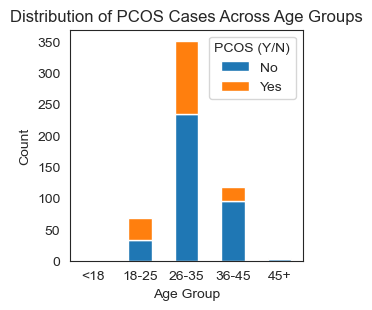

In [20]:
age_group_counts.plot(kind='bar', stacked=True, figsize=(3, 3))
plt.title('Distribution of PCOS Cases Across Age Groups')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.legend(title='PCOS (Y/N)', loc='upper right', labels=['No', 'Yes'])
plt.xticks(rotation=0)
plt.show()

tells us that the age groups of 18 to 15 and 26 to 35 are the most affected by PCOS.

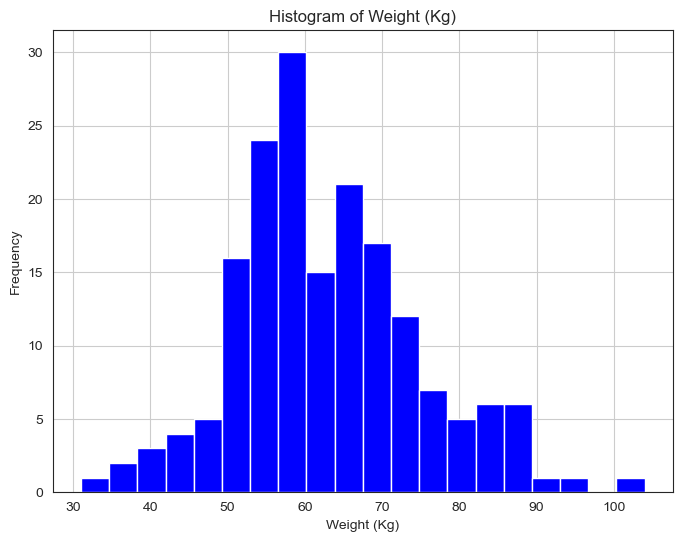

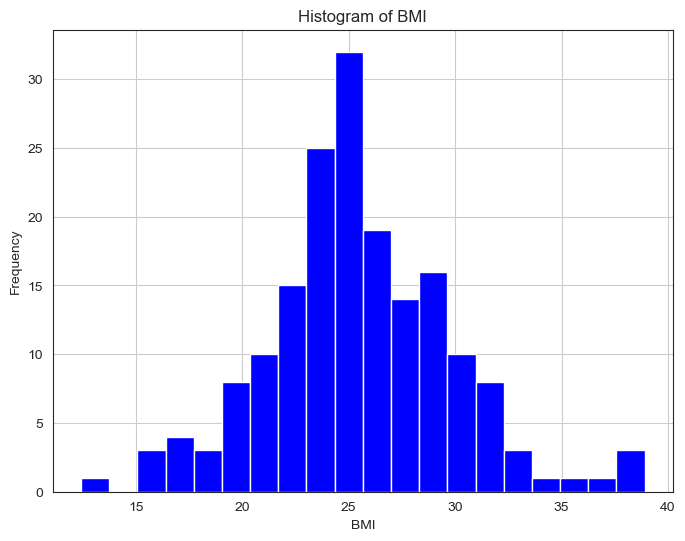

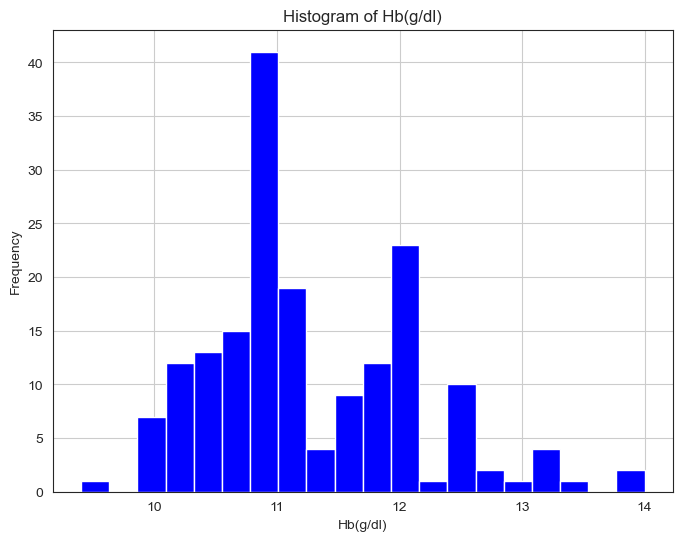

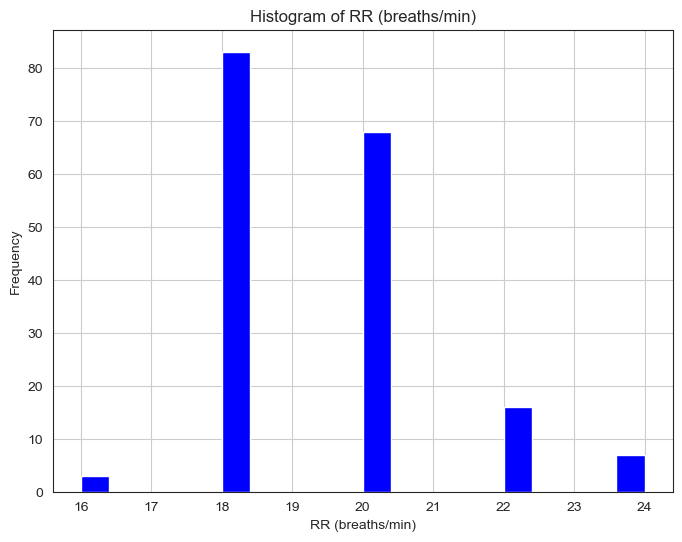

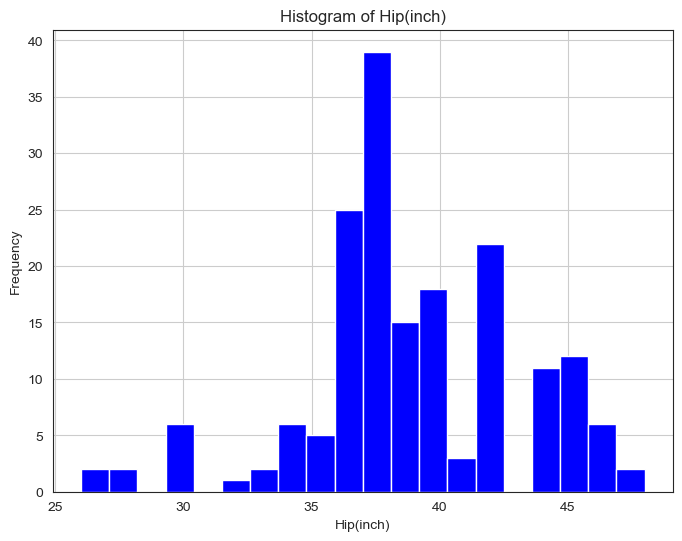

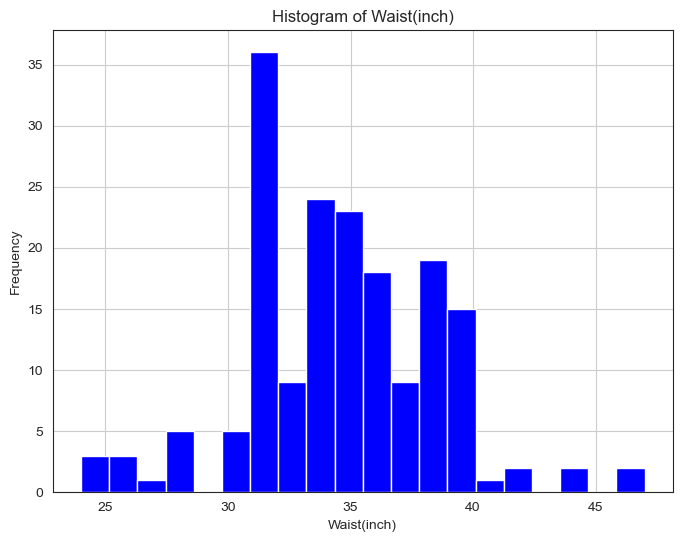

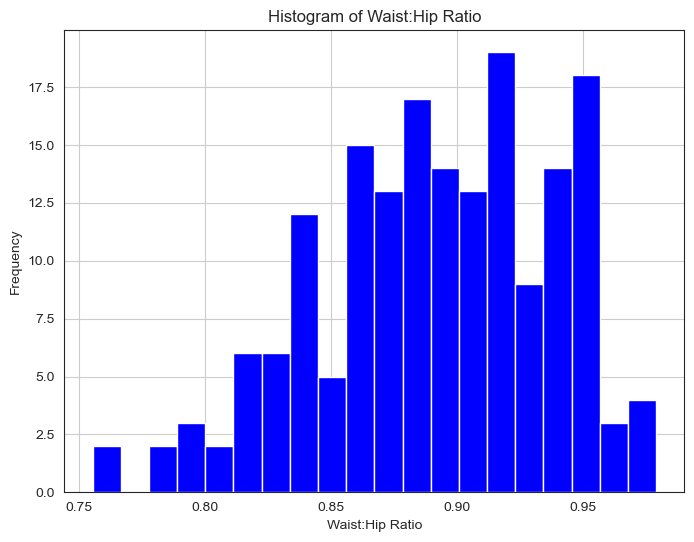

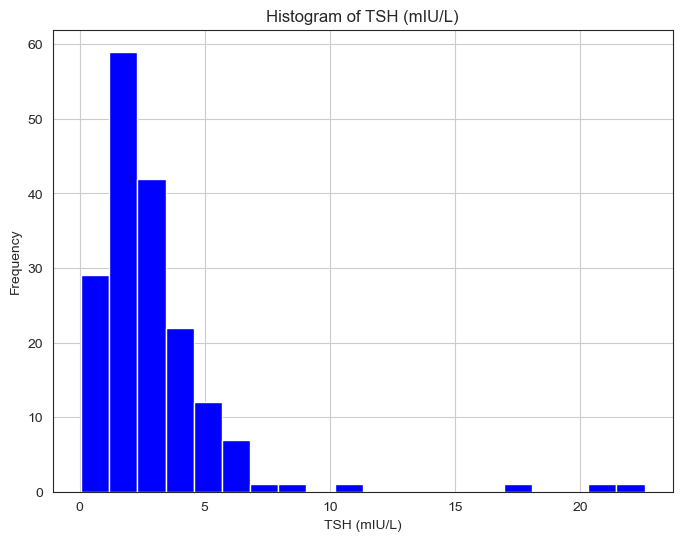

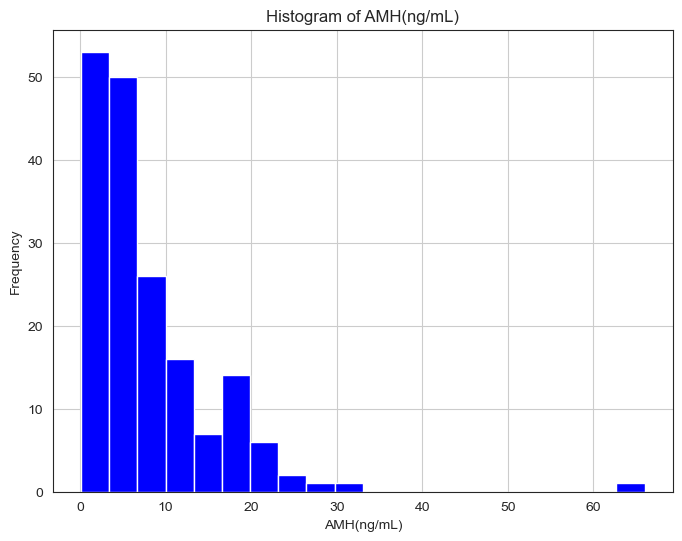

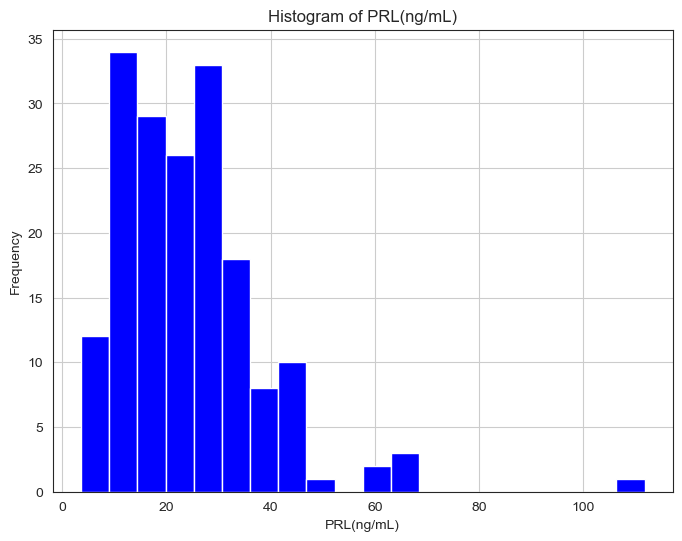

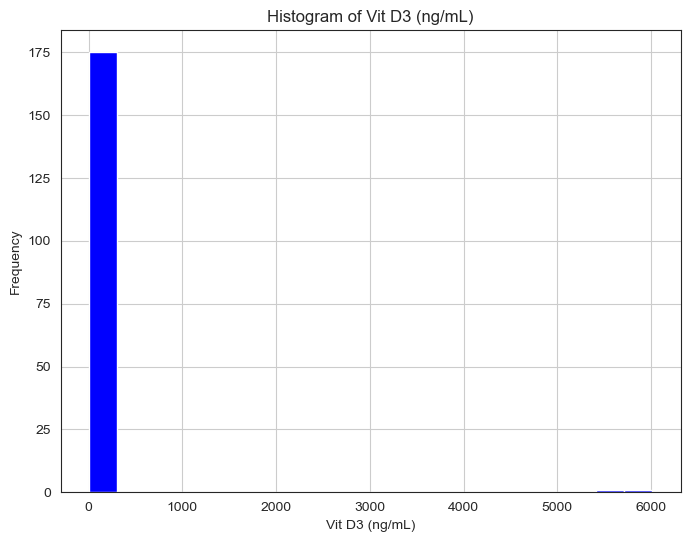

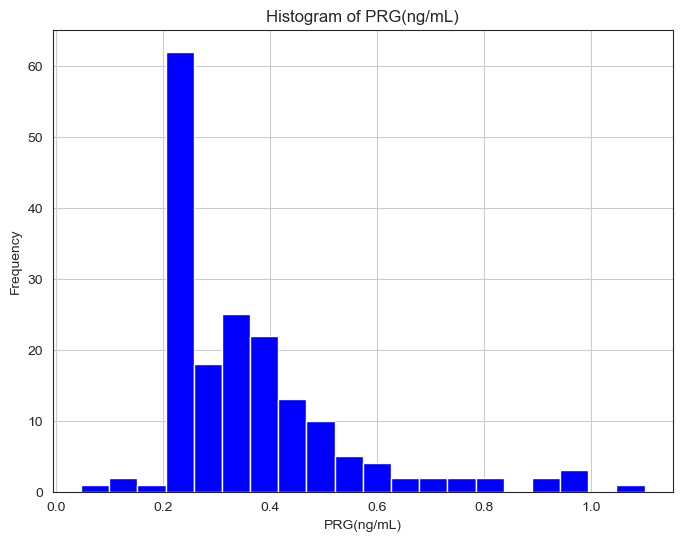

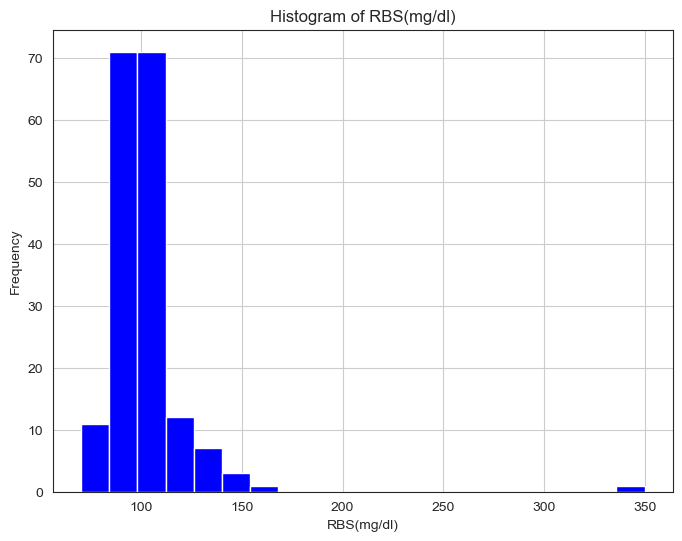

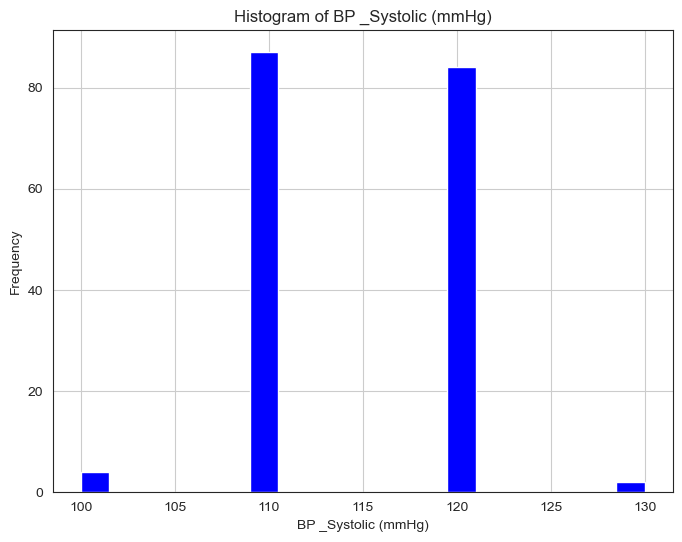

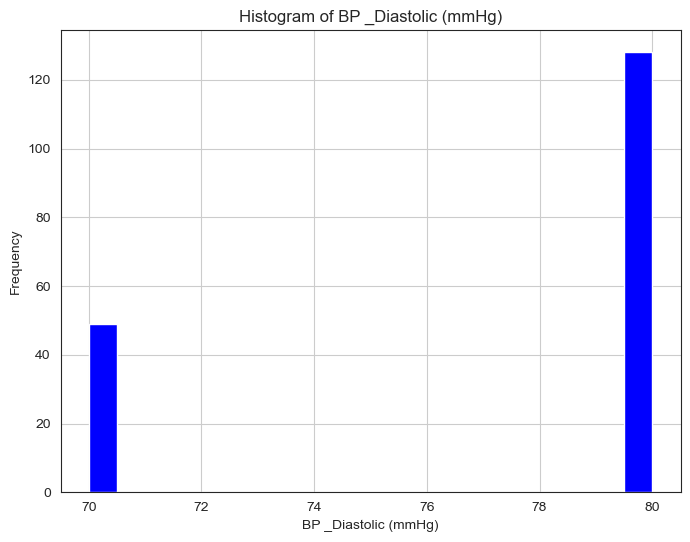

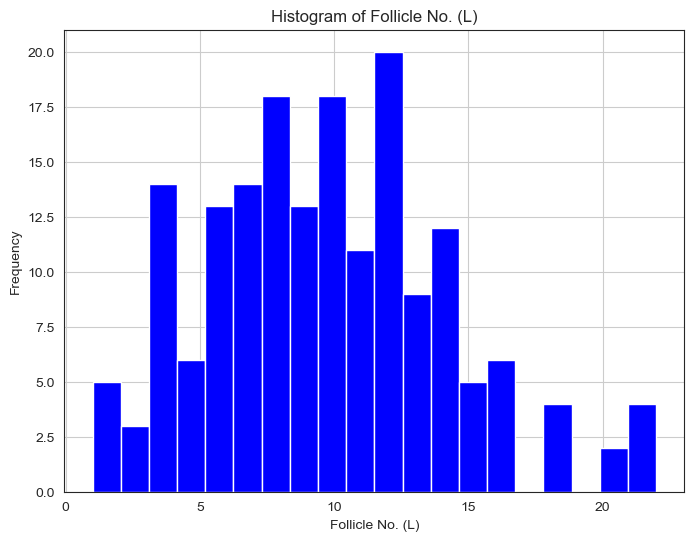

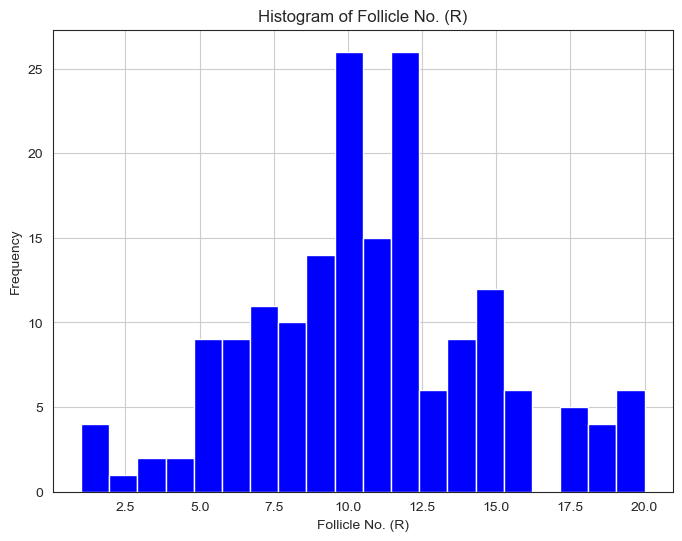

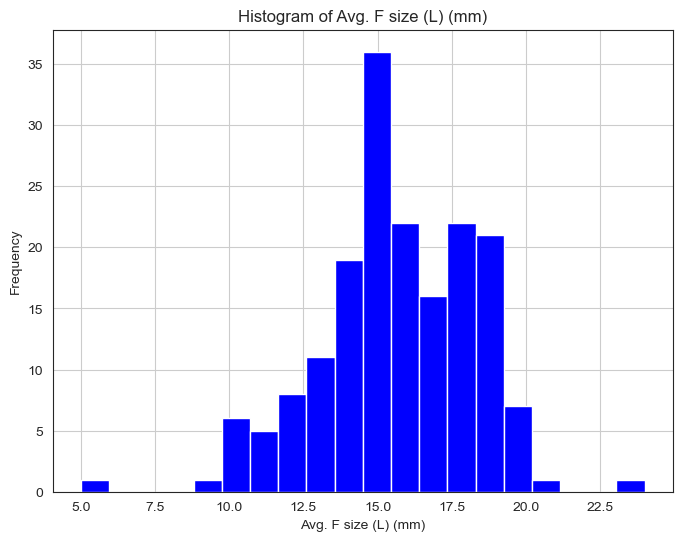

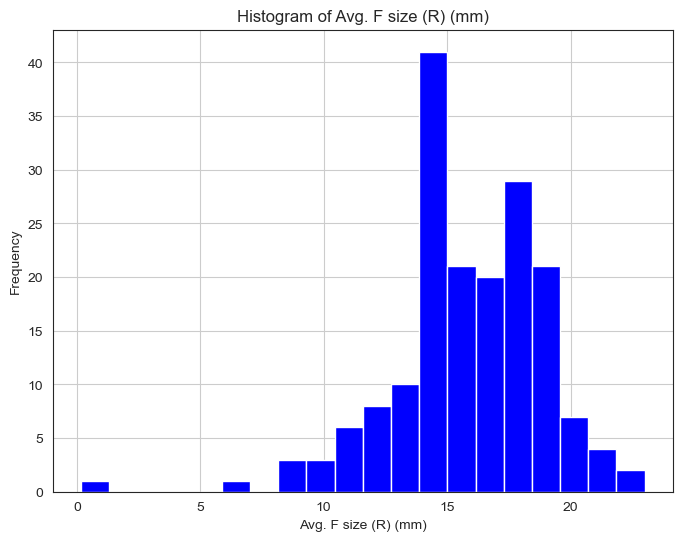

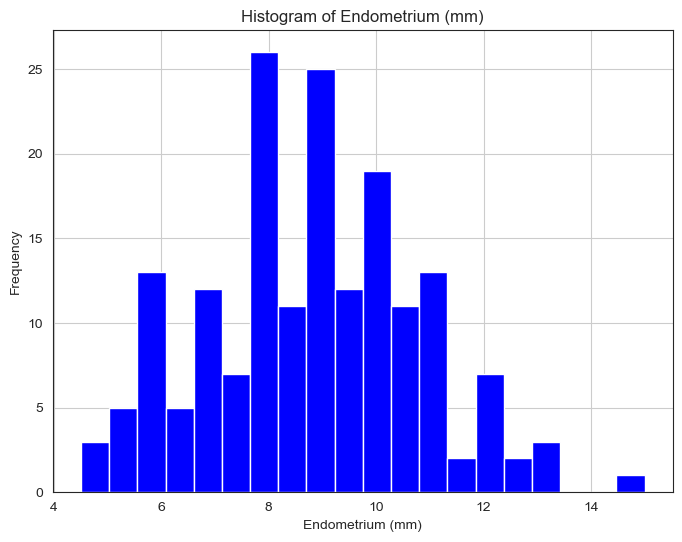

In [21]:
numerical_attributes = ['Weight (Kg)', 'BMI', 'Hb(g/dl)','RR (breaths/min)',
                        'Hip(inch)', 'Waist(inch)', 'Waist:Hip Ratio', 'TSH (mIU/L)', 'AMH(ng/mL)', 'PRL(ng/mL)',
                        'Vit D3 (ng/mL)', 'PRG(ng/mL)', 'RBS(mg/dl)', 'BP _Systolic (mmHg)', 'BP _Diastolic (mmHg)',
                        'Follicle No. (L)', 'Follicle No. (R)', 'Avg. F size (L) (mm)', 'Avg. F size (R) (mm)',
                        'Endometrium (mm)']
df_pcos = df[df['Target']==1]
# Create histograms for each numerical attribute
for attribute in numerical_attributes:
    plt.figure(figsize=(8, 6))
    plt.hist(df_pcos[attribute], bins=20, color='blue')
    plt.title(f'Histogram of {attribute}')
    plt.xlabel(attribute)
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()

In [22]:
weight_groups = [0,30,50,60,70,80,100,float('inf')]
weight_labels = ['<30','30-50','56-60','61-70','71-80','81-100','100+']
df['Weight Group'] = pd.cut(df['Weight (Kg)'], bins = weight_groups , labels = weight_labels)

weight_group_counts = df.groupby(['Weight Group', 'Target']).size().unstack()
type(weight_group_counts)

<IPython.core.display.Javascript object>

pandas.core.frame.DataFrame

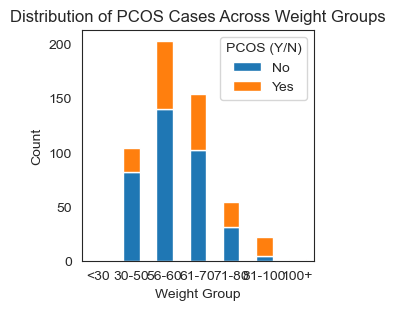

In [23]:
weight_group_counts.plot(kind='bar', stacked=True, figsize=(3, 3))
plt.title('Distribution of PCOS Cases Across Weight Groups')
plt.xlabel('Weight Group')
plt.ylabel('Count')
plt.legend(title='PCOS (Y/N)', loc='upper right', labels=['No', 'Yes'])
plt.xticks(rotation=0)
plt.show()

In [24]:
df.shape

(541, 44)

In [25]:
df.head()

,Target,Age (yrs),Weight (Kg),Height(Cm),BMI,Blood Group,Pulse rate(bpm),RR (breaths/min),Hb(g/dl),Cycle(R/I),...,BP _Diastolic (mmHg),Follicle No. (L),Follicle No. (R),Avg. F size (L) (mm),Avg. F size (R) (mm),Endometrium (mm),I beta-HCG(mIU/mL),II beta-HCG(mIU/mL),Age Group,Weight Group
0,0,28,44.6,152.0,19.300000,15,78,22,10.48,2,...,80,3,3,18.0,18.0,8.5,1.99,1.99,26-35,30-50
1,0,36,65.0,161.5,24.921163,15,74,20,11.70,2,...,70,3,5,15.0,14.0,3.7,60.80,1.99,36-45,61-70
2,1,33,68.8,165.0,25.270891,11,72,18,11.80,2,...,80,13,15,18.0,20.0,10.0,494.08,494.08,26-35,61-70
3,0,37,65.0,148.0,29.674945,13,72,20,12.00,2,...,70,2,2,15.0,14.0,7.5,1.99,1.99,36-45,61-70
4,0,25,52.0,161.0,20.060954,11,72,18,10.00,2,...,80,3,4,16.0,14.0,7.0,801.45,801.45,18-25,56-60


Text(0.5, 0, '0 - Not PCOS, 1 - PCOS')

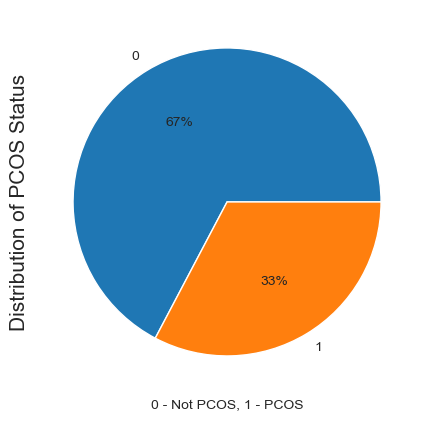

In [26]:
fig, ax1 = plt.subplots(figsize=(10, 5))
df.groupby('Target').size().plot(kind='pie', autopct='%1.0f%%',)
ax1.set_ylabel('Distribution of PCOS Status', size=15)
ax1.set_xlabel('0 - Not PCOS, 1 - PCOS')

In [27]:
X= df.drop(['Target','Age Group','Weight Group'],axis=1)
y = df['Target'].values
X.head()


,Age (yrs),Weight (Kg),Height(Cm),BMI,Blood Group,Pulse rate(bpm),RR (breaths/min),Hb(g/dl),Cycle(R/I),Cycle length(days),...,Reg.Exercise(Y/N),BP _Systolic (mmHg),BP _Diastolic (mmHg),Follicle No. (L),Follicle No. (R),Avg. F size (L) (mm),Avg. F size (R) (mm),Endometrium (mm),I beta-HCG(mIU/mL),II beta-HCG(mIU/mL)
0,28,44.6,152.0,19.300000,15,78,22,10.48,2,5,...,0,110,80,3,3,18.0,18.0,8.5,1.99,1.99
1,36,65.0,161.5,24.921163,15,74,20,11.70,2,5,...,0,120,70,3,5,15.0,14.0,3.7,60.80,1.99
2,33,68.8,165.0,25.270891,11,72,18,11.80,2,5,...,0,120,80,13,15,18.0,20.0,10.0,494.08,494.08
3,37,65.0,148.0,29.674945,13,72,20,12.00,2,5,...,0,120,70,2,2,15.0,14.0,7.5,1.99,1.99
4,25,52.0,161.0,20.060954,11,72,18,10.00,2,5,...,0,120,80,3,4,16.0,14.0,7.0,801.45,801.45


In [28]:
from imblearn.combine import SMOTETomek
from imblearn.under_sampling import NearMiss
smk = SMOTETomek(random_state=42)
X_res,y_res=smk.fit_resample(X,y)

In [29]:
X_res.shape

(692, 41)

In [30]:
from sklearn.neighbors import KNeighborsClassifier

In [31]:
from sklearn.naive_bayes import GaussianNB

In [32]:
from sklearn.tree import DecisionTreeClassifier

In [33]:
model_list = [LogisticRegression(), GradientBoostingClassifier(),KNeighborsClassifier(n_neighbors = 2),
               SVC(), XGBClassifier(), GaussianNB() ,RandomForestClassifier(n_estimators=9),
              DecisionTreeClassifier(criterion="entropy")]

model_name_list = []
accuracy_list = []

for model_name in model_list: 
    
    model = model_name
    model_cv = cross_val_score(model,
                               X_res,
                               y_res,
                               cv=10,
                               scoring= "accuracy", 
                               n_jobs=-1)
    
    model_name_list.append(model_name.__class__.__name__)
    accuracy_list.append(model_cv.mean())
    
    print(f"{model_name.__class__.__name__} cross validation score: {model_cv.mean()}")
    print("-" * 50)

LogisticRegression cross validation score: 0.8397308488612836
--------------------------------------------------
GradientBoostingClassifier cross validation score: 0.9016770186335403
--------------------------------------------------
KNeighborsClassifier cross validation score: 0.7775569358178054
--------------------------------------------------
SVC cross validation score: 0.5217184265010352
--------------------------------------------------
XGBClassifier cross validation score: 0.8930434782608694
--------------------------------------------------
GaussianNB cross validation score: 0.8408281573498965
--------------------------------------------------
RandomForestClassifier cross validation score: 0.8858178053830228
--------------------------------------------------
DecisionTreeClassifier cross validation score: 0.8294409937888199
--------------------------------------------------


In [37]:
accuracy_list

[0.8397308488612836,
 0.9016770186335403,
 0.7775569358178054,
 0.5217184265010352,
 0.8930434782608694,
 0.8408281573498965,
 0.8858178053830228,
 0.8294409937888199]

In [38]:
data_acc= [['LogisticRegression', 83.97], ['GradientBoostingClassifier', 90.16], ['KNeighborsClassifier', 77.75],['SVC',52.17],['XGBClassifier',89.30],['GaussianNB',84.08],['RandomForestClassifie',88.58],['DecisionTreeClassifie',82.94]]


In [39]:
acc=pd.DataFrame(data_acc, columns=['Name', 'accuracy'])

<IPython.core.display.Javascript object>

(array([0, 1, 2, 3, 4, 5, 6, 7]),
 [Text(0, 0, 'LogisticRegression'),
  Text(1, 0, 'GradientBoostingClassifier'),
  Text(2, 0, 'KNeighborsClassifier'),
  Text(3, 0, 'SVC'),
  Text(4, 0, 'XGBClassifier'),
  Text(5, 0, 'GaussianNB'),
  Text(6, 0, 'RandomForestClassifie'),
  Text(7, 0, 'DecisionTreeClassifie')])

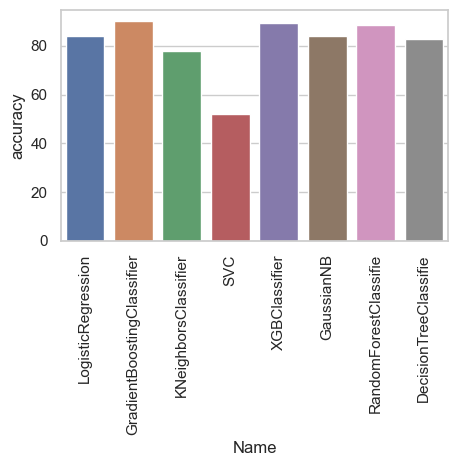

In [44]:
plt.figure(figsize=(5, 3))
sns.set_theme(style="whitegrid")
ax = sns.barplot(x=acc.Name, y="accuracy", data=acc)
plt.xticks(rotation=90)

In [46]:
model_list = [LogisticRegression(), GradientBoostingClassifier(),KNeighborsClassifier(n_neighbors = 2),
               SVC(), XGBClassifier(), GaussianNB() ,RandomForestClassifier(n_estimators=9),
              DecisionTreeClassifier(criterion="entropy")]

model_name_list = []
recall_list = []

for model_name in model_list: 
    
    model = model_name
    model_cv = cross_val_score(model,
                               X_res,
                               y_res,
                               cv=10,
                               scoring= "recall", 
                               n_jobs=-1)
    
    model_name_list.append(model_name.__class__.__name__)
    recall_list.append(model_cv.mean())
    
    print(f"{model_name.__class__.__name__} cross validation score: {model_cv.mean()}")
    print("-" * 50)

LogisticRegression cross validation score: 0.8468067226890756
--------------------------------------------------
GradientBoostingClassifier cross validation score: 0.9015966386554621
--------------------------------------------------
KNeighborsClassifier cross validation score: 0.736218487394958
--------------------------------------------------
SVC cross validation score: 0.15899159663865545
--------------------------------------------------
XGBClassifier cross validation score: 0.9014285714285715
--------------------------------------------------
GaussianNB cross validation score: 0.896218487394958
--------------------------------------------------
RandomForestClassifier cross validation score: 0.8930252100840337
--------------------------------------------------
DecisionTreeClassifier cross validation score: 0.8784873949579831
--------------------------------------------------


In [49]:
#models= ['LogisticRegression', 'GradientBoostingClassifier','KNeighborsClassifier',
              # 'SVC', 'XGBClassifier','GaussianNB','RandomForestClassifier',
              #'DecisionTreeClassifier']

In [50]:
recall_list

[0.8468067226890756,
 0.9015966386554621,
 0.736218487394958,
 0.15899159663865545,
 0.9014285714285715,
 0.896218487394958,
 0.8930252100840337,
 0.8784873949579831]

In [51]:
recal=[84.68,
 90.15,
 73.62,
 15.89,
 90.14,
 89.62,
 89.30,
 87.84]

In [58]:
datare = {'modaels': ['LogisticRegression', 'GradientBoostingClassifier','KNeighborsClassifier',
               'SVC', 'XGBClassifier','GaussianNB','RandomForestClassifier',
              'DecisionTreeClassifier'],
        'recall': [84.68,90.15,73.62,15.89,90.14,89.62,89.30,87.84]}
 

In [61]:
dq= pd.DataFrame(datare)

<IPython.core.display.Javascript object>

(array([0, 1, 2, 3, 4, 5, 6, 7]),
 [Text(0, 0, 'LogisticRegression'),
  Text(1, 0, 'GradientBoostingClassifier'),
  Text(2, 0, 'KNeighborsClassifier'),
  Text(3, 0, 'SVC'),
  Text(4, 0, 'XGBClassifier'),
  Text(5, 0, 'GaussianNB'),
  Text(6, 0, 'RandomForestClassifier'),
  Text(7, 0, 'DecisionTreeClassifier')])

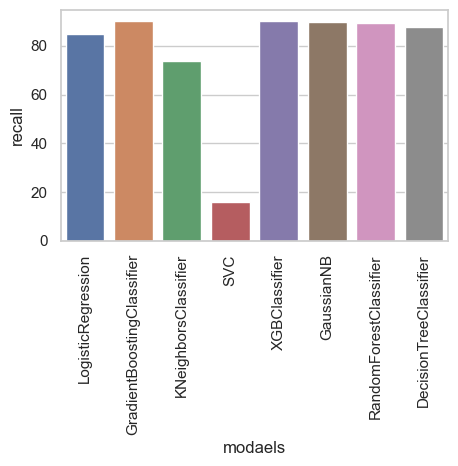

In [62]:
plt.figure(figsize=(5, 3))
sns.set_theme(style="whitegrid")
ax = sns.barplot(x=dq.modaels, y="recall", data=dq)
plt.xticks(rotation=90)

In [66]:
model_list = [LogisticRegression(), GradientBoostingClassifier(),KNeighborsClassifier(n_neighbors = 2),
               SVC(), XGBClassifier(), GaussianNB() ,RandomForestClassifier(n_estimators=9),
              DecisionTreeClassifier(criterion="entropy")]

model_name_list = []
pre_list = []

for model_name in model_list: 
    
    model = model_name
    model_cv = cross_val_score(model,
                               X_res,
                               y_res,
                               cv=10,
                               scoring= "precision", 
                               n_jobs=-1)
    
    model_name_list.append(model_name.__class__.__name__)
    pre_list.append(model_cv.mean())
    
    print(f"{model_name.__class__.__name__} cross validation score: {model_cv.mean()}")
    print("-" * 50)

LogisticRegression cross validation score: 0.8413062359753537
--------------------------------------------------
GradientBoostingClassifier cross validation score: 0.9073600348600349
--------------------------------------------------
KNeighborsClassifier cross validation score: 0.8062519065168173
--------------------------------------------------
SVC cross validation score: 0.5807750582750583
--------------------------------------------------
XGBClassifier cross validation score: 0.8912885004918062
--------------------------------------------------
GaussianNB cross validation score: 0.8182317877326385
--------------------------------------------------
RandomForestClassifier cross validation score: 0.8629757600544139
--------------------------------------------------
DecisionTreeClassifier cross validation score: 0.8113181644689383
--------------------------------------------------


In [67]:
pre_list

[0.8413062359753537,
 0.9073600348600349,
 0.8062519065168173,
 0.5807750582750583,
 0.8912885004918062,
 0.8182317877326385,
 0.8629757600544139,
 0.8113181644689383]

In [68]:
datapre = {'models': ['LogisticRegression', 'GradientBoostingClassifier','KNeighborsClassifier',
               'SVC', 'XGBClassifier','GaussianNB','RandomForestClassifier',
              'DecisionTreeClassifier'],
        'precision': [84.13,90.73,80.62,58.07,89.12,81.82,86.29,81.13]}
 

In [69]:
dz=pd.DataFrame(datapre)

<IPython.core.display.Javascript object>

(array([0, 1, 2, 3, 4, 5, 6, 7]),
 [Text(0, 0, 'LogisticRegression'),
  Text(1, 0, 'GradientBoostingClassifier'),
  Text(2, 0, 'KNeighborsClassifier'),
  Text(3, 0, 'SVC'),
  Text(4, 0, 'XGBClassifier'),
  Text(5, 0, 'GaussianNB'),
  Text(6, 0, 'RandomForestClassifier'),
  Text(7, 0, 'DecisionTreeClassifier')])

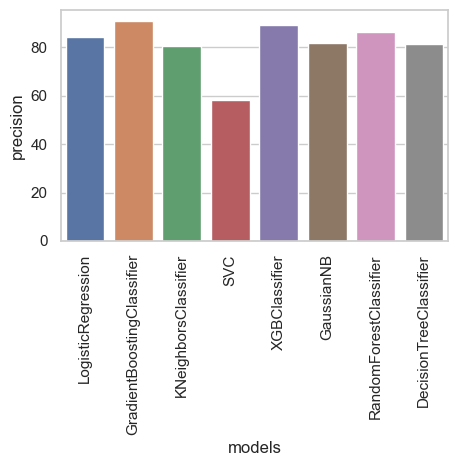

In [70]:
plt.figure(figsize=(5, 3))
sns.set_theme(style="whitegrid")
ax = sns.barplot(x=dz.models, y="precision", data=dz)
plt.xticks(rotation=90)

In [72]:
model_list = [LogisticRegression(), GradientBoostingClassifier(),KNeighborsClassifier(n_neighbors = 2),
               SVC(), XGBClassifier(), GaussianNB() ,RandomForestClassifier(n_estimators=9),
              DecisionTreeClassifier(criterion="entropy")]

model_name_list = []
pre_list = []

for model_name in model_list: 
    
    model = model_name
    model_cv = cross_val_score(model,
                               X_res,
                               y_res,
                               cv=10,
                               scoring= "roc_auc", 
                               n_jobs=-1)
    
    model_name_list.append(model_name.__class__.__name__)
    pre_list.append(model_cv.mean())
    
    print(f"{model_name.__class__.__name__} cross validation score: {model_cv.mean()}")
    print("-" * 50)

LogisticRegression cross validation score: 0.9176446578631454
--------------------------------------------------
GradientBoostingClassifier cross validation score: 0.9687563025210084
--------------------------------------------------
KNeighborsClassifier cross validation score: 0.8167959183673469
--------------------------------------------------
SVC cross validation score: 0.6134861944777911
--------------------------------------------------
XGBClassifier cross validation score: 0.9710996398559424
--------------------------------------------------
GaussianNB cross validation score: 0.9150756302521008
--------------------------------------------------
RandomForestClassifier cross validation score: 0.947079231692677
--------------------------------------------------
DecisionTreeClassifier cross validation score: 0.8353361344537815
--------------------------------------------------


In [73]:
model_list = [LogisticRegression(), GradientBoostingClassifier(),KNeighborsClassifier(n_neighbors = 2),
               SVC(), XGBClassifier(), GaussianNB() ,RandomForestClassifier(n_estimators=9),
              DecisionTreeClassifier(criterion="entropy")]

model_name_list = []
pre_list = []

for model_name in model_list: 
    
    model = model_name
    model_cv = cross_val_score(model,
                               X_res,
                               y_res,
                               cv=10,
                               scoring= "jaccard", 
                               n_jobs=-1)
    
    model_name_list.append(model_name.__class__.__name__)
    pre_list.append(model_cv.mean())
    
    print(f"{model_name.__class__.__name__} cross validation score: {model_cv.mean()}")
    print("-" * 50)

LogisticRegression cross validation score: 0.7317174770746199
--------------------------------------------------
GradientBoostingClassifier cross validation score: 0.822220784136702
--------------------------------------------------
KNeighborsClassifier cross validation score: 0.6248822335301657
--------------------------------------------------
SVC cross validation score: 0.1433534548810544
--------------------------------------------------
XGBClassifier cross validation score: 0.8087262370983301
--------------------------------------------------
GaussianNB cross validation score: 0.7388053972244966
--------------------------------------------------
RandomForestClassifier cross validation score: 0.8003362703362702
--------------------------------------------------
DecisionTreeClassifier cross validation score: 0.7266526037144301
--------------------------------------------------


In [74]:
model_list = [LogisticRegression(), GradientBoostingClassifier(),KNeighborsClassifier(n_neighbors = 2),
               SVC(), XGBClassifier(), GaussianNB() ,RandomForestClassifier(n_estimators=9),
              DecisionTreeClassifier(criterion="entropy")]

model_name_list = []
pre_list = []

for model_name in model_list: 
    
    model = model_name
    model_cv = cross_val_score(model,
                               X_res,
                               y_res,
                               cv=10,
                               scoring= "r2", 
                               n_jobs=-1)
    
    model_name_list.append(model_name.__class__.__name__)
    pre_list.append(model_cv.mean())
    
    print(f"{model_name.__class__.__name__} cross validation score: {model_cv.mean()}")
    print("-" * 50)

LogisticRegression cross validation score: 0.35882352941176476
--------------------------------------------------
GradientBoostingClassifier cross validation score: 0.6066386554621849
--------------------------------------------------
KNeighborsClassifier cross validation score: 0.1100840336134455
--------------------------------------------------
SVC cross validation score: -0.9134453781512603
--------------------------------------------------
XGBClassifier cross validation score: 0.5721008403361345
--------------------------------------------------
GaussianNB cross validation score: 0.36319327731092443
--------------------------------------------------
RandomForestClassifier cross validation score: 0.46747899159663875
--------------------------------------------------
DecisionTreeClassifier cross validation score: 0.3352941176470589
--------------------------------------------------


In [76]:
model_list = [LogisticRegression(), GradientBoostingClassifier(),KNeighborsClassifier(n_neighbors = 2),
               SVC(), XGBClassifier(), GaussianNB() ,RandomForestClassifier(n_estimators=9),
              DecisionTreeClassifier(criterion="entropy")]

model_name_list = []
pre_list = []

for model_name in model_list: 
    
    model = model_name
    model_cv = cross_val_score(model,
                               X_res,
                               y_res,
                               cv=10,
                               scoring= "f1", 
                               n_jobs=-1)
    
    model_name_list.append(model_name.__class__.__name__)
    pre_list.append(model_cv.mean())
    
    print(f"{model_name.__class__.__name__} cross validation score: {model_cv.mean()}")
    print("-" * 50)

LogisticRegression cross validation score: 0.8408046290634437
--------------------------------------------------
GradientBoostingClassifier cross validation score: 0.9013380818013816
--------------------------------------------------
KNeighborsClassifier cross validation score: 0.7648540026806293
--------------------------------------------------
SVC cross validation score: 0.24563349292748785
--------------------------------------------------
XGBClassifier cross validation score: 0.893146084349328
--------------------------------------------------
GaussianNB cross validation score: 0.8474167459341342
--------------------------------------------------
RandomForestClassifier cross validation score: 0.8857886334426068
--------------------------------------------------
DecisionTreeClassifier cross validation score: 0.8420077455328446
--------------------------------------------------
